# ДЗ №1 СУНЦ МГУ - Numpy practice

_Задачи позаимствованы из курса ML ФКН ПМИ где они были позаимствованы из курса практикума кафедры ММП факультета ВМК МГУ_ 

### Туториальные задачи
__(9 баллов)__

Ниже приведены задачи на работу с numpy-массивами. Для каждой из задач нужно привести 2 реализации: одна без использования numpy (cчитайте, что там, где на входе или выходе должны быть numpy array, будут просто списки), а вторая полностью векторизованная (без использования питоновских циклов/map/list comprehension). Невекторизованная реализация каждой из задач оценивается в __0.5 балла__, векторизованная – в __1 балл__.

Реализации без использования векторизации нужно записать в файл functions.py, а векторизованные &mdash; в файл functions_vectorized.py

Для каждой задачи, приведённой ниже сравните скорость работы невекторизованной и векторизованной реализации. С помощью пакета matplotlib постройте графики времени работы в зависимости от размера данных. __Графики должны выглядеть опрятно!__ То есть должны быть подписаны оси, названия графиков, и т.д. Например, ниже представлены хороший и плохой графики:

//anaconda/lib/python2.7/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


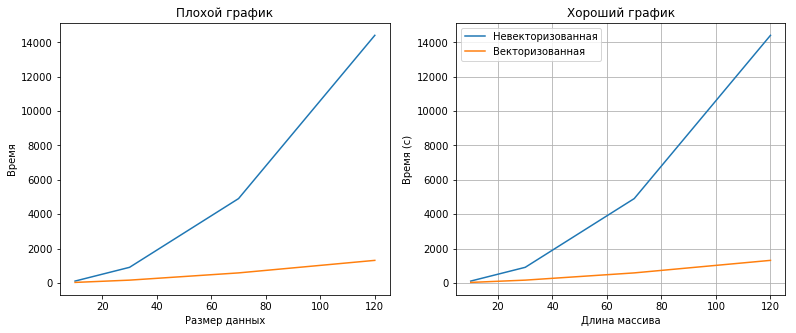

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

data_size = np.array([10, 30, 70, 120])
time_non_vectorized = data_size ** 2 + 10
time_vectorized = data_size ** 1.5

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(13, 5))

ax1.plot(data_size, time_non_vectorized)
ax1.plot(data_size, time_vectorized)
ax1.set_title(u"Плохой график")
ax1.set_xlabel(u"Размер данных")
ax1.set_ylabel(u"Время")

ax2.plot(data_size, time_non_vectorized, label=u"Невекторизованная")
ax2.plot(data_size, time_vectorized, label=u"Векторизованная")
ax2.set_title(u"Хороший график")
ax2.set_xlabel(u"Длина массива")
ax2.set_ylabel(u"Время (с)")
ax2.grid()
ax2.legend()

f.show()              

* __Задача 1__: Подсчитать произведение ненулевых элементов на диагонали прямоугольной матрицы.  
 Например, для X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]]) ответ – 3.

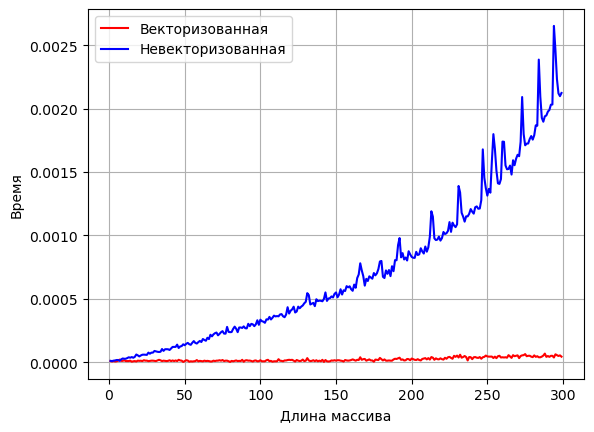

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from importlib import reload
reload(f)
reload(fv)
%matplotlib inline
vectortime = []
nontime = []

for i in range(1, 300):
    tmvec = 0
    tmnon = 0
    for j in range(300):
        x_ln = random.randint(i, 300)
        x = np.random.rand(i, x_ln) * 15
        tm1 = time()
        fv.prod_non_zero_diag(x)
        tmvec += time() - tm1

        tm1 = time()
        f.prod_non_zero_diag(x.tolist())
        tmnon += time() - tm1
        x_ln = random.randint(i, 300)
        x = np.random.rand(x_ln, i)
        tm1 = time()
        fv.prod_non_zero_diag(x)
        tmvec += time() - tm1

        tm1 = time()
        f.prod_non_zero_diag(x.tolist())
        tmnon += time() - tm1
    vectortime.append(tmvec / 600)
    nontime.append(tmnon / 600)



plt.plot([i for i in range(1, 300)], vectortime , label=u"Векторизованная", color='red')
plt.plot([i for i in range(1, 300)], nontime , label=u"Невекторизованная", color = 'blue')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

 
 
* __Задача 2__: Даны два вектора x и y. Проверить, задают ли они одно и то же мультимножество.  
  Например, для x = np.array([1, 2, 2, 4]), y = np.array([4, 2, 1, 2]) ответ – True.
  
  


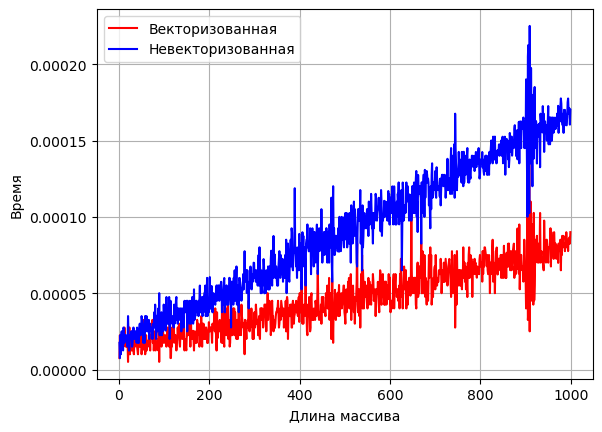

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from importlib import reload
reload(f)
reload(fv)
%matplotlib inline
vectortime = []
nontime = []

for i in range(1, 1000):
    tmvec = 0
    tmnon = 0
    for q in range(1, 200):
        x = np.random.rand(i) * 15
        y = np.random.rand(i) * 15
        tm1 = time()
        fv.are_multisets_equal(x, y)
        tmvec += time() - tm1

        tm1 = time()
        f.are_multisets_equal(x.tolist(), y.tolist())
        tmnon += time() - tm1
    for q in range(1, 200):
        x = np.random.rand(i) * 15
        y = np.random.rand(random.randint(i, 1000)) * 15
        tm1 = time()
        fv.are_multisets_equal(x, y)
        tmvec += time() - tm1

        tm1 = time()
        f.are_multisets_equal(x.tolist(), y.tolist())
        tmnon += time() - tm1
    vectortime.append(tmvec / 400)
    nontime.append(tmnon / 400)
        



plt.plot([i for i in range(1, 1000)], vectortime , label=u"Векторизованная", color='red')
plt.plot([i for i in range(1, 1000)], nontime , label=u"Невекторизованная", color = 'blue')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

* __Задача 3__: Найти максимальный элемент в векторе x среди элементов, перед которыми стоит нулевой.  
 Например, для x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) ответ – 5.

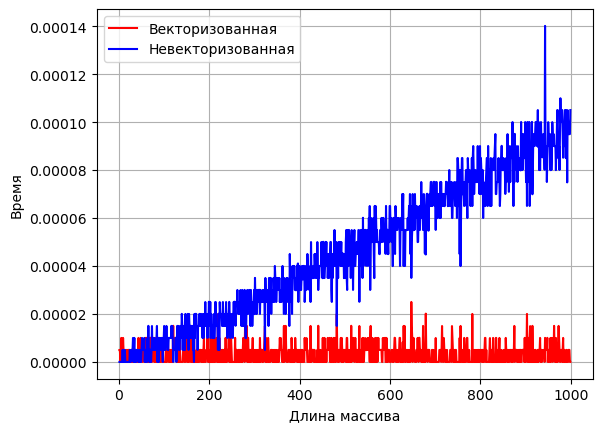

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from importlib import reload
reload(f)
reload(fv)
%matplotlib inline
vectortime = []
nontime = []

for i in range(1, 1000):
    tmvec = 0
    tmnon = 0
    for q in range(1, 200):
        x = np.random.rand(i) * 15
        tm1 = time()
        fv.max_after_zero(x)
        tmvec += time() - tm1

        tm1 = time()
        f.max_after_zero(x.tolist())
        tmnon += time() - tm1
    vectortime.append(tmvec / 200)
    nontime.append(tmnon / 200)
        



plt.plot([i for i in range(1, 1000)], vectortime , label=u"Векторизованная", color='red')
plt.plot([i for i in range(1, 1000)], nontime , label=u"Невекторизованная", color = 'blue')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

 
 
* __ Задача 4__: Дан трёхмерный массив, содержащий изображение, размера (height, width, numChannels), а также вектор длины numChannels. Сложить каналы изображения с указанными весами, и вернуть результат в виде матрицы размера (height, width). В ноутбуке приведите пример работы функции – преобразуйте цветное изображение в оттенки серого, использовав коэффициенты np.array([0.299, 0.587, 0.114]). Считать реальное изображение можно при помощи функции scipy.misc.imread (если изображение не в формате png, установите пакет pillow).


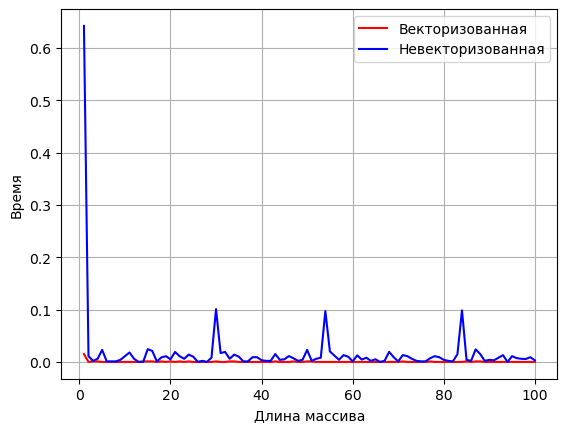

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from PIL import Image
from importlib import reload
reload(f)
reload(fv)
%matplotlib inline
vectortime = []
nontime = []

img = Image.open('animeboy.jpg')
 
vec = np.asarray(img)
coeff = np.array([0.299, 0.587, 0.114])
tmvec = 0
tmnon = 0
tm1 = time()
fv.convert_image(vec, coeff)
tmvec += time() - tm1

tm1 = time()
f.convert_image(vec.tolist(), coeff.tolist())
tmnon += time() - tm1
vectortime.append(tmvec)
nontime.append(tmnon )
for i in range(1, 100):
    tmvec = 0
    tmnon = 0
    x = np.random.rand(random.randint(10, 200), random.randint(10, 200), 3) * 10
    tm1 = time()
    fv.convert_image(x, coeff)
    tmvec += time() - tm1

    tm1 = time()
    f.convert_image(x.tolist(), coeff.tolist())
    tmnon += time() - tm1
    vectortime.append(tmvec)
    nontime.append(tmnon)



plt.plot([i for i in range(1, 101)], vectortime , label=u"Векторизованная", color='red')
plt.plot([i for i in range(1, 101)], nontime , label=u"Невекторизованная", color = 'blue')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

* __Задача 5__: Реализовать кодирование длин серий (Run-length encoding). Для некоторого вектора x необходимо вернуть кортеж из двух векторов одинаковой длины. Первый содержит числа, а второй - сколько раз их нужно повторить.  
 Например, для x = np.array([2, 2, 2, 3, 3, 3, 5]) ответ – (np.array([2, 3, 5]), np.array([3, 3, 1])).

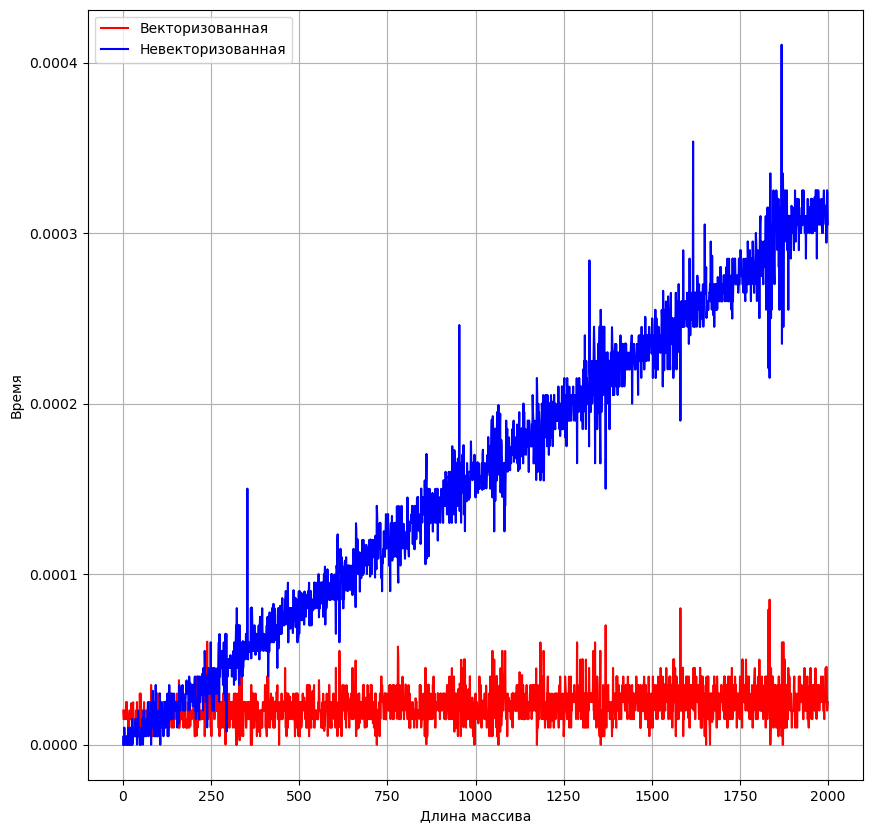

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from PIL import Image
from importlib import reload
reload(f)
reload(fv)
%matplotlib inline
vectortime = []
nontime = []

tmvec = 0
tmnon = 0
for i in range(1, 2000):
    tmvec = 0
    tmnon = 0
    for qq in range(200):
        x = np.random.rand(i) * 15
        tm1 = time()
        fv.run_length_encoding(x)
        tmvec += time() - tm1
        tm1 = time()
        f.run_length_encoding(x.tolist())
        tmnon += time() - tm1
    vectortime.append(tmvec / 200)
    nontime.append(tmnon / 200)

from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.plot([i for i in range(1, 2000)], vectortime , label=u"Векторизованная", color='red')
plt.plot([i for i in range(1, 2000)], nontime , label=u"Невекторизованная", color = 'blue')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

 
 
* __Задача 6__: Даны две выборки объектов - X и Y. Вычислить матрицу евклидовых расстояний между объектами. Дополнительно сравните с функцией scipy.spatial.distance.cdist по скорости работы (сравнения приведите ниже в ноутбуке).

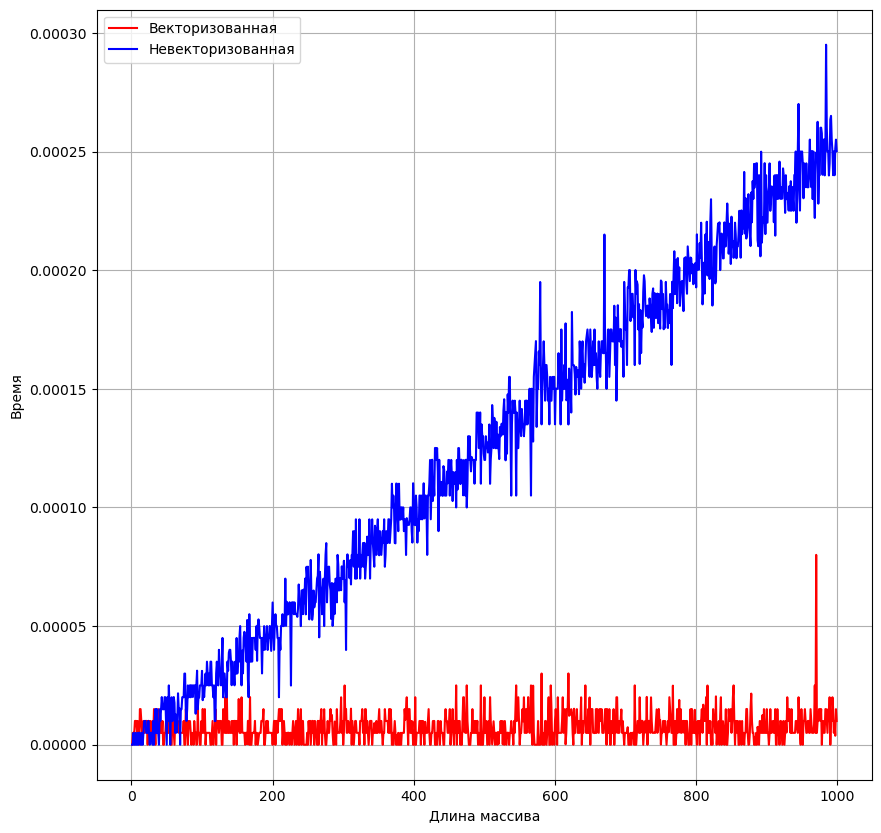

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import random
import functions as f
import functions_vectorized as fv
from time import time
from PIL import Image
from importlib import reload
reload(f)
reload(fv)
%matplotlib inline
vectortime = []
nontime = []

tmvec = 0
tmnon = 0
for i in range(1, 1000):
    tmvec = 0
    tmnon = 0
    for qq in range(200):
        x = np.random.rand(i) * 15
        y = np.random.rand(i) * 15
        tm1 = time()
        fv.pairwise_distance(x, y)
        tmvec += time() - tm1
        tm1 = time()
        f.pairwise_distance(x.tolist(), y.tolist())
        tmnon += time() - tm1
    vectortime.append(tmvec / 200)
    nontime.append(tmnon / 200)

from matplotlib.pyplot import figure

figure(figsize=(10, 10))

plt.plot([i for i in range(1, 1000)], vectortime , label=u"Векторизованная", color='red')
plt.plot([i for i in range(1, 1000)], nontime , label=u"Невекторизованная", color = 'blue')
plt.xlabel(u"Длина массива")
plt.ylabel(u"Время")
plt.grid()
plt.legend()
plt.show()

### Туториал по Markdown

__(1 балл)__

Напишите краткий (а в данной домашке ещё и почти бесмысленный) отчёт с использованием 4-5 различных вариантов разметки/выделения текста.

In [ ]:
# code here